In [38]:
import numpy as np
import numpy.ma as ma
import brain_diffusion.msd as msd
import brain_diffusion.histogram_utils as huts
import matplotlib.pyplot as plt

# Loading Data

In [8]:
DIR = '../data/'
file = 'sample_data'

In [11]:
!ls ../data/

Traj_sample_data_1.tif.csv


In [9]:
total1, frames, x_m, y_m, xs_m, ys_m = msd.MSD_iteration(DIR, file)

In [23]:
time = np.linspace(0, frames, frames+1)
print('Total number of particles: ', total1)
print('Total frames in video: ', frames)

Total number of particles:  225
Total frames in video:  72


In [18]:
x_m[0:10, 0:4]

array([[  56.241,  184.192,  101.127,   25.757],
       [  56.241,  184.192,  101.127,   25.757],
       [  56.909,  183.711,  101.257,   25.704],
       [   0.   ,  184.415,  101.446,   25.793],
       [   0.   ,  184.353,  100.731,   25.881],
       [   0.   ,  185.158,  101.248,   26.292],
       [   0.   ,  184.957,  101.323,   26.871],
       [   0.   ,  185.   ,  101.475,   27.847],
       [   0.   ,  184.548,  102.453,   27.641],
       [   0.   ,  185.182,  102.373,   27.781]])

# MSD Analysis

In [29]:
geoM2xy, gSEM, SM1x, SM1y, SM2xy = msd.vectorized_MMSD_calcs(frames, total1, xs_m, ys_m)

In [51]:
SM2xy_name = 'sample_SM2xy_data.csv'
np.savetxt(SM2xy_name, SM2xy, delimiter=',')

# Plotting the Data

In [28]:
%matplotlib inline

(0, 40)

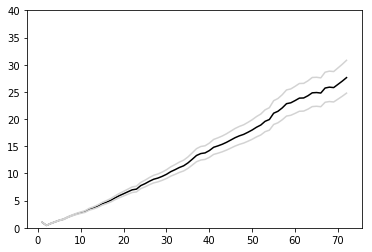

In [42]:
yhi = 40

plt.figure()
plt.plot(time[1:], np.exp(geoM2xy), color='k')
plt.plot(time[1:], np.exp(geoM2xy+gSEM), color='lightgray')
plt.plot(time[1:], np.exp(geoM2xy-gSEM), color='lightgray')

plt.ylim(0, yhi)

(0, 40)

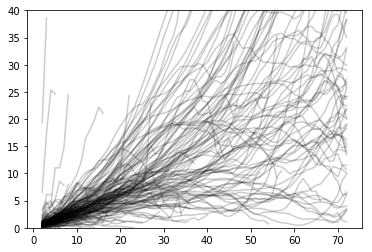

In [45]:
plt.figure()

for part in range(0, total1):
    plt.plot(time[1:], ma.masked_equal(SM2xy[:, part], 0), color='k', alpha=0.2)
    
plt.ylim(0, yhi)

'Graph completed successfully'

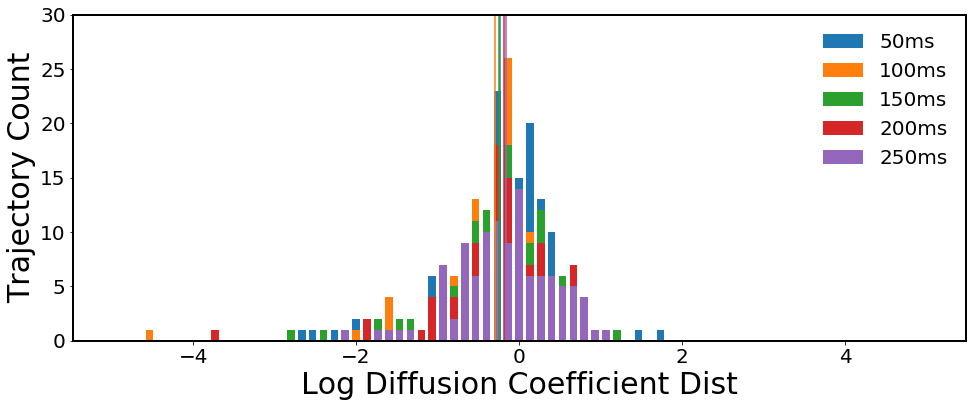

In [56]:
huts.histogram_by_video(SM2xy_name, fps=10, y_range=30)

In [57]:
!rm sample*png
!rm sample_csv

sample_SM2xy_data.csv
sample_SM2xy_data_hist.png
Training_Template.ipynb
